In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Classified Data')
#It can be found here https://mega.nz/#!qpNWUBia!2rAtAmt8F3lcXqSC18yhKhRonlFt0DdnB51c24uAXzk
#P.S. open the link in Desktop browser or in desktop mode of your mobile browser for best availability

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#dropped this column because of the column was representing row no.s which was not required for our FS task

In [5]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

In [8]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [9]:
scaledFeatures = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [10]:
scaledFeatures

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [11]:
dfFeatures = pd.DataFrame(scaledFeatures, columns=df.columns[:-1])

In [12]:
dfFeatures.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [13]:
from sklearn.cross_validation import train_test_split

D:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [14]:
X = dfFeatures
y = df['TARGET CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
KNN = KNeighborsClassifier()

In [17]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [18]:
predictions = KNN.predict(X_test)

In [19]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0], d

In [20]:
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
print(confusion_matrix(y_test, predictions))
print ('\n')
print(classification_report(y_test, predictions))

[[154   5]
 [ 12 129]]


             precision    recall  f1-score   support

          0       0.93      0.97      0.95       159
          1       0.96      0.91      0.94       141

avg / total       0.94      0.94      0.94       300



In [22]:
errorRate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    predictionSamples = knn.predict(X_test)
    errorRate.append(np.mean(predictionSamples != y_test))

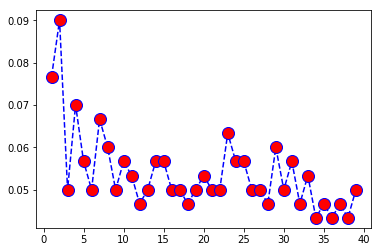

In [23]:
plt.plot(range(1,40), errorRate, color='blue', linestyle='dashed', marker='o',
     markerfacecolor='red', markersize=12)

In [24]:
import timeit

In [25]:
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors= 30)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
elapsedTime = timeit.default_timer() - startTime
print("elapsed time : ",elapsedTime)

elapsed time :  0.018215248152107195


In [26]:
print(confusion_matrix(y_test, predictions))
print ('\n')
print(classification_report(y_test, predictions))

[[152   7]
 [  8 133]]


             precision    recall  f1-score   support

          0       0.95      0.96      0.95       159
          1       0.95      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



In [27]:
'''TILL THIS ONLY KNN IS USED WHICH IS PROVIDING 96% ACCURACY WITH COMPUTATION TIME OF 0.0124'''

'TILL THIS ONLY KNN IS USED WHICH IS PROVIDING 96% ACCURACY WITH COMPUTATION TIME OF 0.0124'

In [28]:
'''NOW FROM HERE WE HAVE PASSED THE WHOLE DATA TO OUR SCA ALGORITHM '''

'NOW FROM HERE WE HAVE PASSED THE WHOLE DATA TO OUR SCA ALGORITHM '

In [29]:
data = dfFeatures

In [141]:
import random
import math


#SCA IMPLEMENTATION
#begin
#Randomly initialization of each search agents in the population X(t = 1,2,...,m)
totalFeatures = len(data.columns[:-1])
a = 1
r1 = a
t = 0
subsets = []
trainedFeatures = []
subsets.append(random.sample(range(1,totalFeatures),int(totalFeatures/3)))#initializing first random subset
lowestError = 100 #initializing as highest errorRate for comparison purpose

#Function for checking the new generated subset tempSet is already present in the already initialized subsets or not
def isRepeat(presentSubsets, newSubset):
    #print(subsets)
    #print(tempSet)
    newSubset.sort()
    for subset in presentSubsets:
        subset.sort()
        if(subset[:] == newSubset[:]):
            return True
    return False
        
#for generating random search agents in the population   
def randomSearchAgents(m, n):
    i = 1
    while i<m:
        X = random.sample(range(1,totalFeatures),n)
        if (isRepeat(subsets, X) == False):
            subsets.append(X)
            i += 1
        else:
            continue
            
#EQUATION 1
def updateUsingSineCosine(X):
    featureSubset = []
    for j in range(len(X)):
        #print(X[j])
#         if(s%2 == 0):
        feature = int(X[j] + r1*math.sin(r2)*abs(r3*P[j]-X[j]))
#         else:
#             feature = int(X[j] + r1*math.cos(r2)*abs(r3*P[j]-X[j]))
        feature %= totalFeatures
        featureSubset.append(feature)
    return featureSubset


#FOR CHECKING THE SCORE FOR EACH SELECTED FEATURE SUBSET
def trainTestScore(X, y):
    X.head()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
    startTime = timeit.default_timer()
    knn = KNeighborsClassifier(n_neighbors = 17)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    elapsedTime = timeit.default_timer() - startTime
    print("time taken : ",elapsedTime)
    error = np.mean(prediction != y_test)
    errorRate.append(error)
    return error

#here subsets list contains the list of randomly initialized search agent indices

#INITIALIZE the max numbers of iteration Tmax, we can take it as the total number of columns present
Tmax = totalFeatures
P = []

'''randomly initialize feature subsets, parameter1 denotes total number of feature subsets, here taken as total no of feature avaiable
and parameter 2 denotes number of features in each subsets, here we are considering one third of the total number of features'''

randomSearchAgents(totalFeatures, int(totalFeatures/3))

print("randomly initialized subsets: ",subsets)

trainedFeatures = subsets[:]

while t<Tmax:
    #foreach search agent Xi in the population do
    '''NOVEL 
        here the feature subsets generated by randomSearchAgents method are not repeatative, 
        if any randomly generated feature subset is already present in the previous generated 
        ones then it is neglected and a new feature subset is generated randomly and checked again.
        This process continues until required number of feature subsets are generated which are all unique
    NOVEL'''
    for subset in subsets:
        #Evaluate Xi via the fitness function. if f(Xi)
        if(t > 0):
            if(isRepeat(trainedFeatures, subset) == False):
                trainedFeatures.append(subset)
                #print(trainedFeatures)
                print('new feature : ',subset, "t=",t)
            else:
                print("repeat")
        error = trainTestScore(data.iloc[:,subset], df['TARGET CLASS'])
        print("subset : ",subset," error : ",error, " lowest error : ", lowestError)
        #if f(Xi) better than f(P) then
        #Set P = Xi;
        if (error < lowestError):
            P = subset
            lowestError = error
    
    #Update r1 using equation 2
    
    r1 = a - t*(a/Tmax)#equation 2
    
    #Generate randomly new values for r2, r3 and s.
    
    s += 1
    r2 = random.uniform(0.1, 1.0)
#     while r2 == 0 :
#         r2 = random.uniform(-1, 1.0)
    r3 = random.uniform(0.1, 1.0)
#     while r3 == 0 :
#         r3 = random.uniform(0.1, 1.0)
    print('\n\n r2:',r2,' r3:',r3,' s:',s,' r1:',r1)
    #foreach search agent Xi in the population do
    #Update Xi using equation 1.
    for i in range(len(subsets)):
        subsets[i] = updateUsingSineCosine(subsets[i])
    print(subsets)
    print(P)
    t += 1
#Return P best solution obtained so far.
print("best solution: ",P)
print(lowestError)

randomly initialized subsets:  [[3, 6, 7], [2, 6, 7], [1, 2, 8], [2, 4, 6], [2, 7, 8], [5, 6, 7], [2, 3, 7], [1, 3, 4], [1, 5, 8]]
time taken :  0.004225705464705243
subset :  [3, 6, 7]  error :  0.23939393939393938  lowest error :  100
time taken :  0.003194879091097391
subset :  [2, 6, 7]  error :  0.12727272727272726  lowest error :  0.23939393939393938
time taken :  0.0035635189869935857
subset :  [1, 2, 8]  error :  0.09090909090909091  lowest error :  0.12727272727272726
time taken :  0.003515732333653432
subset :  [2, 4, 6]  error :  0.22424242424242424  lowest error :  0.09090909090909091
time taken :  0.003354167934958241
subset :  [2, 7, 8]  error :  0.06060606060606061  lowest error :  0.09090909090909091
time taken :  0.0031249057783497847
subset :  [5, 6, 7]  error :  0.20606060606060606  lowest error :  0.06060606060606061
time taken :  0.0035561234335546033
subset :  [2, 3, 7]  error :  0.12424242424242424  lowest error :  0.06060606060606061
time taken :  0.003218772418

time taken :  0.0035032167807003134
subset :  [1, 4, 5]  error :  0.296969696969697  lowest error :  0.06060606060606061
repeat
time taken :  0.004260976566001773
subset :  [0, 3, 5]  error :  0.24545454545454545  lowest error :  0.06060606060606061


 r2: 0.4888259782561193  r3: 0.8888342640116305  s: 467  r1: 0.22222222222222232
[[0, 4, 7], [0, 2, 7], [0, 3, 5], [2, 4, 7], [0, 2, 4], [0, 0, 0], [0, 2, 4], [1, 4, 5], [0, 3, 5]]
[2, 7, 8]
repeat
time taken :  0.004457812065083999
subset :  [0, 4, 7]  error :  0.15757575757575756  lowest error :  0.06060606060606061
repeat
time taken :  0.004275198783943779
subset :  [0, 2, 7]  error :  0.09696969696969697  lowest error :  0.06060606060606061
repeat
time taken :  0.0034565679052320775
subset :  [0, 3, 5]  error :  0.24545454545454545  lowest error :  0.06060606060606061
repeat
time taken :  0.003452016795563395
subset :  [2, 4, 7]  error :  0.11818181818181818  lowest error :  0.06060606060606061
repeat
time taken :  0.00355669232158106

In [44]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,P], df['TARGET CLASS'], test_size = 0.33, random_state = 42)
startTime = timeit.default_timer()
knn = KNeighborsClassifier(n_neighbors = 17)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
elapsedTime = timeit.default_timer() - startTime
print("time taken : ",elapsedTime)
error = np.mean(prediction != y_test)
print("error : ",error)

time taken :  0.005046043009315326
error :  0.09696969696969697


In [45]:
print(confusion_matrix(y_test, prediction))
print ('\n')
print(classification_report(y_test, prediction))

[[144  11]
 [ 21 154]]


             precision    recall  f1-score   support

          0       0.87      0.93      0.90       155
          1       0.93      0.88      0.91       175

avg / total       0.90      0.90      0.90       330



In [ ]:
'''OUR SCA IS TAKIING VERY REDUCED TIME OF 0.0098 AND PROVIDING ACCURACY OF 94%'''